In [15]:
%load_ext autoreload
%autoreload 2

# Libraries
import matplotlib.pyplot as plt
from matplotlib import image
import numpy as np 
import glob
import os
import cv2
from PIL import Image
import tensorflow as tf
from utils.visualization import show_images
from utils.processing import color2gray, flip_image, random_contrast, random_rotation, random_zoom, random_brightness, data_augmentation, apply_filter
from tensorflow.keras.preprocessing.image import ImageDataGenerator

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Filenames

# Filenames

In [2]:
filenames = {}
folders=[]
for folder in glob.glob(os.path.join('../data','*')):
    name_folder = folder.split(os.sep)[-1]
    filenames[name_folder] = glob.glob(os.path.join(folder,'*'))
    folders.append(name_folder)
    print(name_folder, len(filenames[name_folder]))

Darth Vader 690
Stormtrooper 649
Yoda 488


# Image Visualization

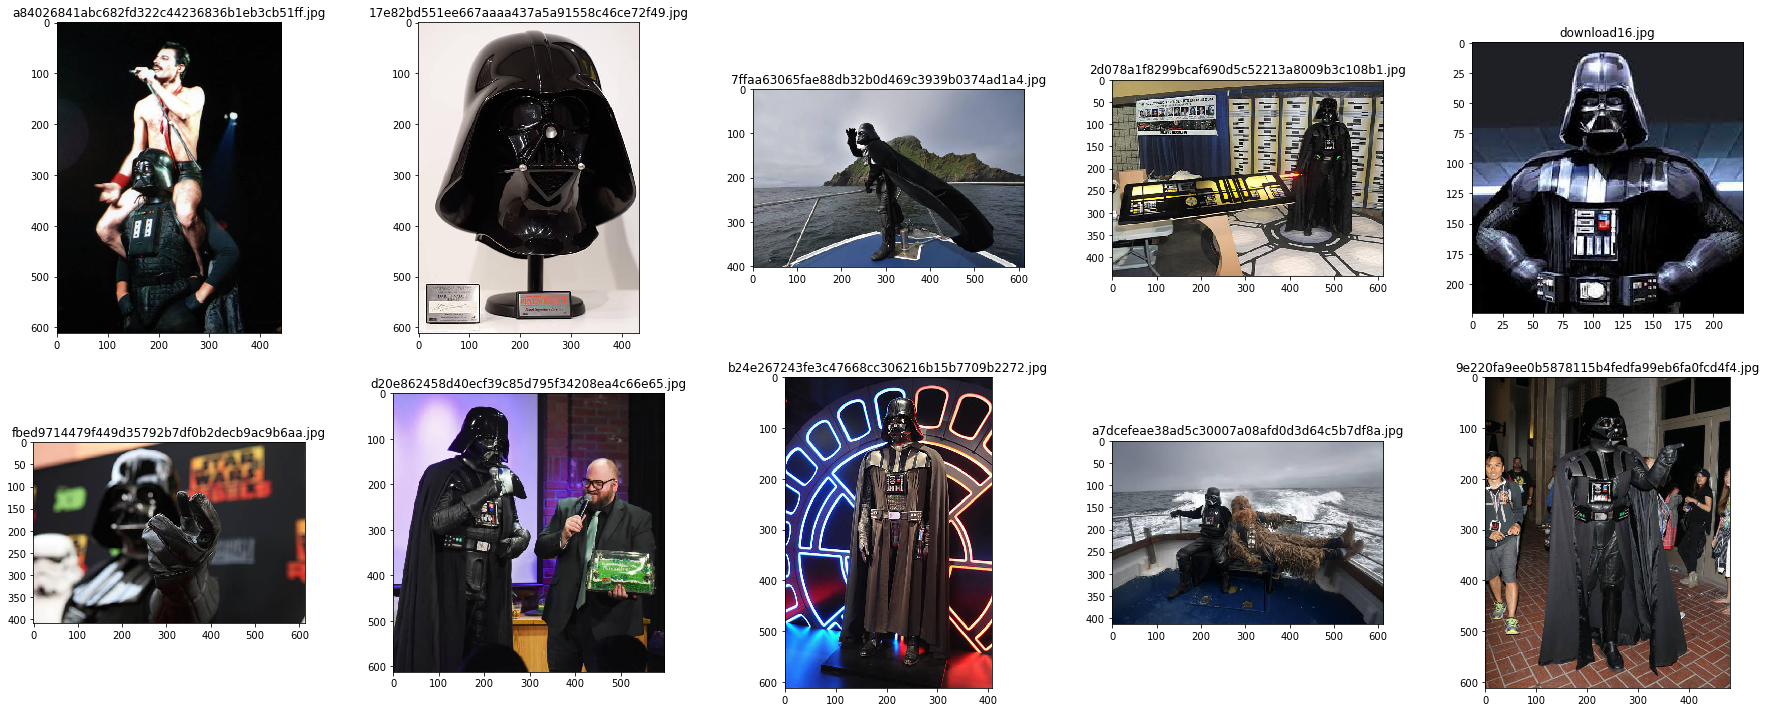

In [4]:
show_images(filenames[folders[0]], stop = 10, selection="random", mode="matplotlib")

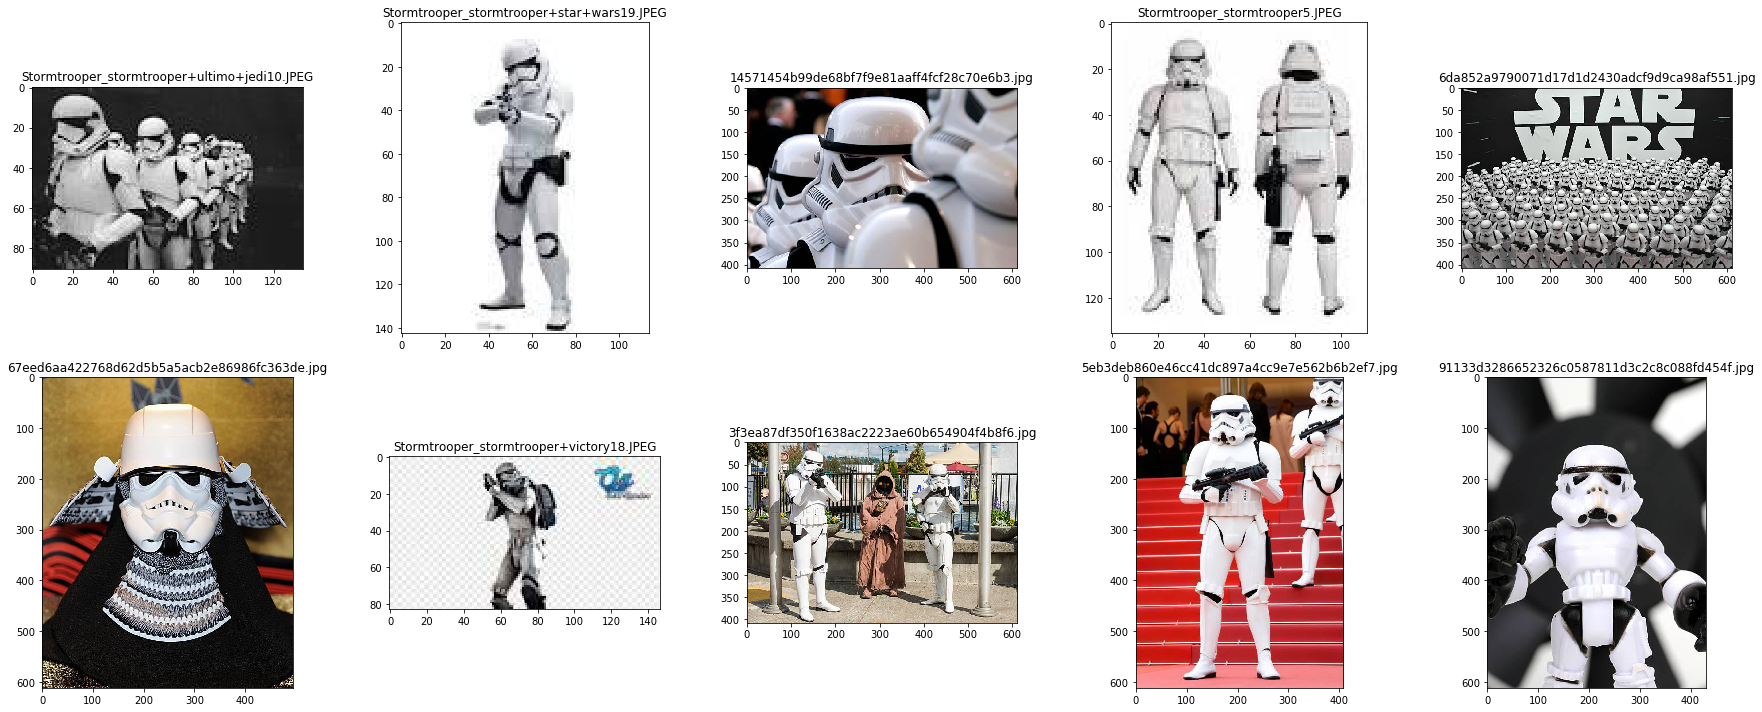

In [200]:
show_images(filenames[folders[1]], stop = 10, selection="random", mode="matplotlib")

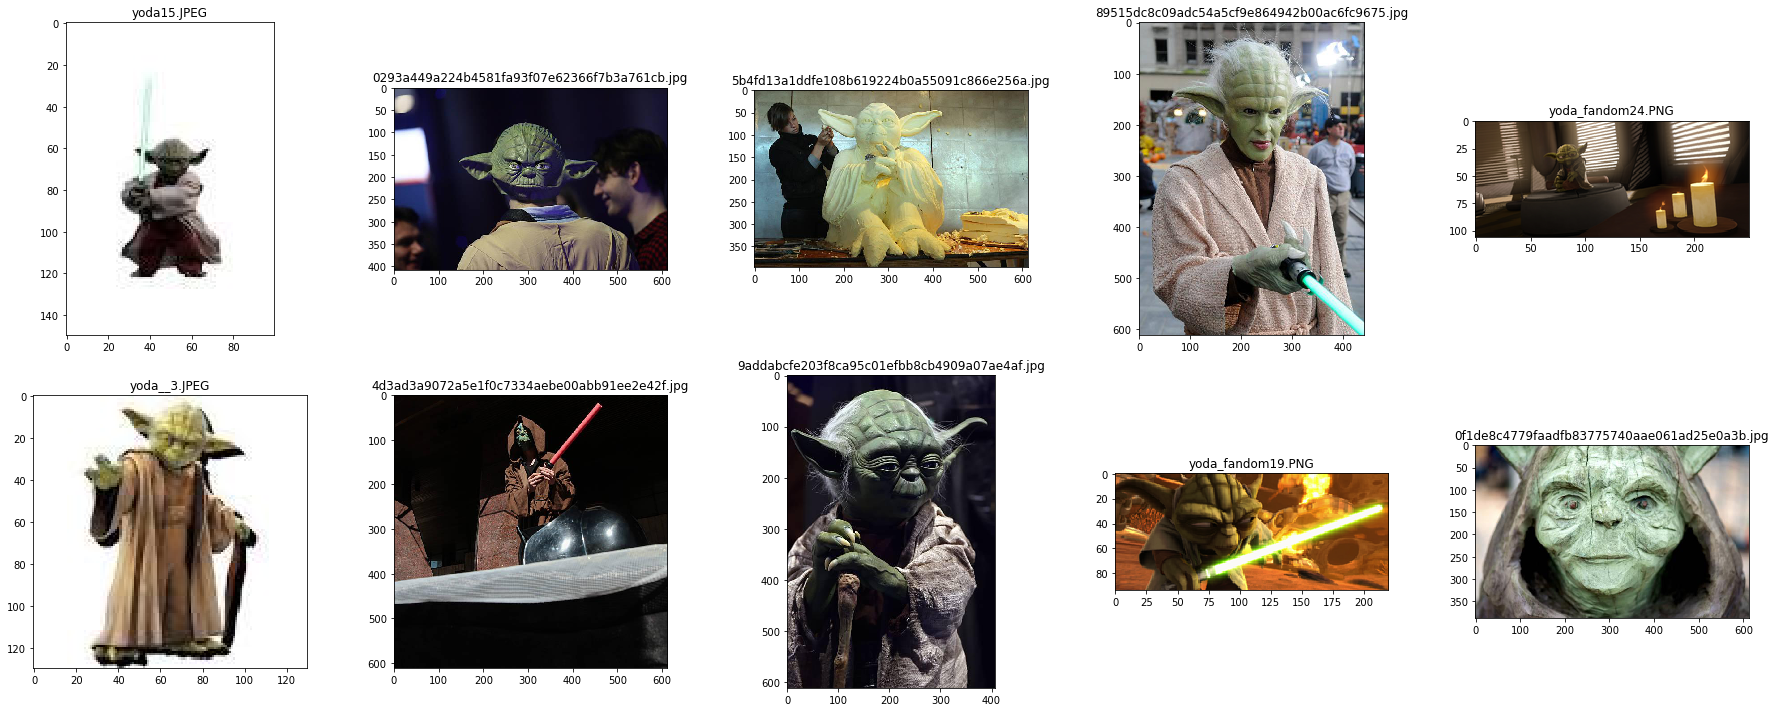

In [201]:
show_images(filenames[folders[2]], stop = 10, selection="random", mode="matplotlib")

# Image Manipulation

In processing.py, one will find some useful functions that we wrote for manipulating images. Those are:

- color2gray()
- flip_image()
- random_contrast()
- random_rotation()
- random_zoom()
- random_brightness()

Let's see the output for each of these functions. 
Check one original image:

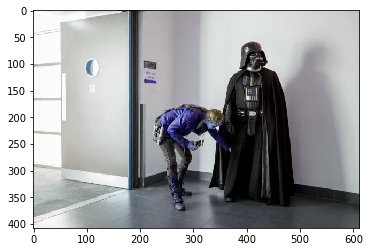

In [203]:
im = cv2.imread(filenames[folders[0]][3])
plt.imshow(im)

## Color to Gray

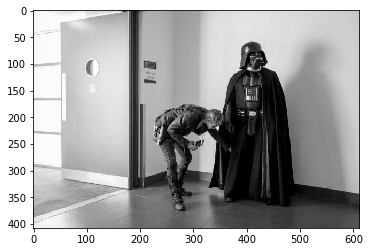

In [205]:
plt.imshow(color2gray(im,mode="numpy"))

## Flip image

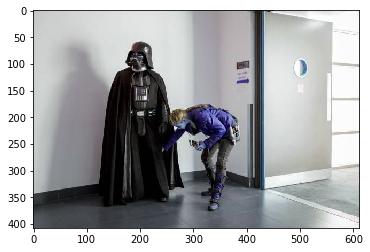

In [206]:
plt.imshow(flip_image(im, direction="vertical", mode="numpy"))

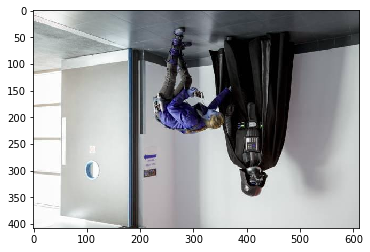

In [207]:
plt.imshow(flip_image(im, direction="horizontal", mode="numpy"))

## Random contrast

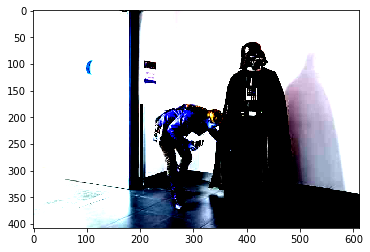

In [208]:
plt.imshow(random_contrast(im, mode="numpy"))

## Random rotation

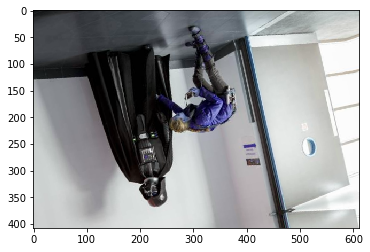

In [209]:
plt.imshow(random_rotation(im))

## Random Zoom

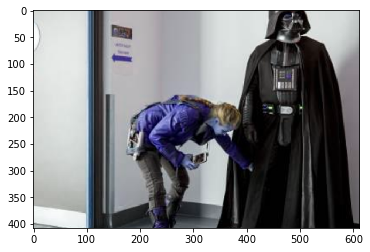

In [210]:
plt.imshow(random_zoom(im))

## Random Brightness

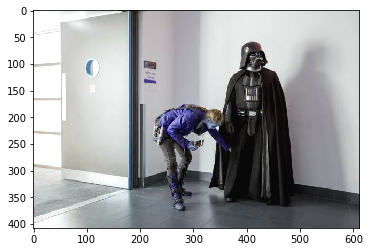

In [211]:
plt.imshow(random_brightness(im))

# Data augmentation

All the functions shown in the section "Image Manipulation" can be used for data augmentation. We created a function for that called data_augmentation(), that receives the number N of images to be generated and return a list of images. It creates:
- N images with random_rotation
- N images with random_zoon
- N images with random_brightness
- N images with random_contrast
- 2 images with flip_image (one horizontally and one vertically fliped)

In [213]:
n = 50
im_aug = data_augmentation(im, n)

# Splitting images in training and testing set

In [3]:
from utils.model import split_train_test

In [8]:
split_train_test(filenames)

# Reading images as tensors

In [9]:
batch_size = 32
img_height = 252
img_width = 252

In [10]:
train_dir = os.path.join("..","data", "train")
valid_dir = os.path.join("..","data", "validation")
test_dir = os.path.join("..","data", "test")


In [16]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip = True,
        validation_split = 0.1,
        rotation_range = 360,
        width_shift_range=0.2,
        height_shift_range=0.2,
        brightness_range = (0.1,0.5))

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(252, 252),
        batch_size=32,
        class_mode='binary')
        
validation_generator = test_datagen.flow_from_directory(
        valid_dir,
        target_size=(252, 252),
        batch_size=32,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(252, 252),
        batch_size=32,
        class_mode='binary')

Found 1461 images belonging to 3 classes.
Found 181 images belonging to 3 classes.
Found 185 images belonging to 3 classes.


# Perceptron

In [17]:
model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

2021-11-15 17:35:53.266902: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-15 17:35:53.267174: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mariko/anaconda3/envs/turing/lib/python3.9/site-packages/cv2/../../lib64:
2021-11-15 17:35:53.267223: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mariko/anaconda3/envs/turing/lib/python3.9/site-packages/cv2/../../lib64:
2021-11-15 17:35:53.267261: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libc

In [18]:
model.compile(optimizer='sgd',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [19]:
model.fit(train_generator, validation_data = validation_generator)

46/46 [==============================] - 18s 382ms/step - loss: 7.0651 - accuracy: 0.3744 - val_loss: 11.7227 - val_accuracy: 0.3646


# CNN

In [21]:
from tensorflow.keras import layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(252, 252, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 250, 250, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 125, 125, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 123, 123, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 59, 59, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 29, 29, 64)      

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_generator, epochs=50, 
                    validation_data=validation_generator)

Epoch 1/50
46/46 [==============================] - 49s 1s/step - loss: 1.3189 - accuracy: 0.3511 - val_loss: 1.1842 - val_accuracy: 0.3812
Epoch 2/50
46/46 [==============================] - 49s 1s/step - loss: 1.0528 - accuracy: 0.4572 - val_loss: 1.0793 - val_accuracy: 0.4530
Epoch 3/50
46/46 [==============================] - 49s 1s/step - loss: 0.9946 - accuracy: 0.5113 - val_loss: 1.0362 - val_accuracy: 0.5414
Epoch 4/50
46/46 [==============================] - 48s 1s/step - loss: 0.9784 - accuracy: 0.5250 - val_loss: 0.9404 - val_accuracy: 0.5912
Epoch 5/50
46/46 [==============================] - 48s 1s/step - loss: 0.9529 - accuracy: 0.5455 - val_loss: 1.1088 - val_accuracy: 0.5138
Epoch 6/50
46/46 [==============================] - 48s 1s/step - loss: 0.8920 - accuracy: 0.6044 - val_loss: 1.7109 - val_accuracy: 0.5414
Epoch 7/50
46/46 [==============================] - 48s 1s/step - loss: 0.8038 - accuracy: 0.6502 - val_loss: 0.7237 - val_accuracy: 0.7293
Epoch 8/50
46/46 [==

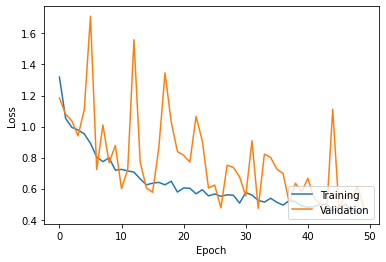

In [24]:
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

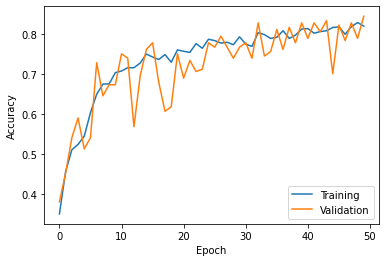

In [25]:
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Transfer Learning: MobileNetV2

In [128]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(252,252,3),
                                               include_top=False,
                                               weights='imagenet')

In [129]:
base_model.trainable = False

In [30]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 252, 252, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 126, 126, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 126, 126, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [130]:
image_batch, label_batch = next(iter(train_generator))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

prediction_layer = tf.keras.layers.Dense(3)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 8, 8, 1280)
(32, 1280)
(32, 3)


In [131]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [135]:
inputs = tf.keras.Input(shape=(252, 252, 3))
#data_augmentation = tf.keras.Sequential([
# tf.keras.layers.RandomFlip('horizontal_and_vertical'),
#  tf.keras.layers.RandomRotation(0.2),
#  tf.keras.layers.RandomContrast(0.2)
#])
#x = data_augmentation(inputs)
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
#x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [136]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [137]:
history = model.fit(train_generator,
                    epochs=50,
                    validation_data=validation_generator)

Epoch 1/50
46/46 [==============================] - 39s 826ms/step - loss: 1.0884 - accuracy: 0.3847 - val_loss: 1.0784 - val_accuracy: 0.3536
Epoch 2/50
46/46 [==============================] - 37s 811ms/step - loss: 1.0876 - accuracy: 0.3819 - val_loss: 1.0669 - val_accuracy: 0.4365
Epoch 3/50
46/46 [==============================] - 35s 763ms/step - loss: 1.0873 - accuracy: 0.3785 - val_loss: 1.0693 - val_accuracy: 0.3536
Epoch 4/50
46/46 [==============================] - 33s 715ms/step - loss: 1.0872 - accuracy: 0.3682 - val_loss: 1.0795 - val_accuracy: 0.3536
Epoch 5/50
46/46 [==============================] - 33s 717ms/step - loss: 1.0890 - accuracy: 0.3532 - val_loss: 1.0591 - val_accuracy: 0.4586
Epoch 6/50
46/46 [==============================] - 33s 714ms/step - loss: 1.0867 - accuracy: 0.3888 - val_loss: 1.0752 - val_accuracy: 0.3757
Epoch 7/50
46/46 [==============================] - 33s 712ms/step - loss: 1.0858 - accuracy: 0.3833 - val_loss: 1.0642 - val_accuracy: 0.4365

# Transfer Learning: ResNet

In [138]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Reshape, Dropout, Input
from tensorflow.keras.models import Model

In [139]:
resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_36 (InputLayer)          [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_36[0][0]']               
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                        

In [142]:
base_model = ResNet50(weights='imagenet', include_top=False)

image_batch, label_batch = next(iter(train_generator))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

prediction_layer = tf.keras.layers.Dense(3)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

for layer in base_model.layers[:]:
      layer.trainable = False
inputs = Input(shape=(252,252,3),name = 'image_input')
x = preprocess_input(inputs)
x = base_model(x)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)

#x = Flatten()(x)
#x = Dense(units=1024, activation='relu')(x)
outputs = Dense(units=3, activation='relu')(x)
model = Model(inputs=inputs, outputs=outputs)

base_learning_rate = 0.000001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()

(32, 8, 8, 2048)
(32, 2048)
(32, 3)
Model: "model_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_input (InputLayer)    [(None, 252, 252, 3)]     0         
                                                                 
 tf.__operators__.getitem_21  (None, 252, 252, 3)      0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_21 (TFOpLamb  (None, 252, 252, 3)      0         
 da)                                                             
                                                                 
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 global_average_pooling2d_6   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                      

In [143]:
model.fit(train_generator, epochs=50, validation_data=validation_generator)

Epoch 1/50
46/46 [==============================] - 100s 2s/step - loss: 1.3380 - accuracy: 0.2971 - val_loss: 1.3236 - val_accuracy: 0.2652
Epoch 2/50
46/46 [==============================] - 89s 2s/step - loss: 1.3518 - accuracy: 0.2731 - val_loss: 1.3198 - val_accuracy: 0.2652
Epoch 3/50
46/46 [==============================] - 74s 2s/step - loss: 1.3439 - accuracy: 0.2772 - val_loss: 1.3160 - val_accuracy: 0.2652
Epoch 4/50
44/46 [===========================>..] - ETA: 2s - loss: 1.3313 - accuracy: 0.2942

KeyboardInterrupt: 

# (not so) Final remarks

In this notebook, I explore some Computer Vision concepts in the context of Darth Vader/Stormtrooper/Yoda classification. I tested the classification performance of a Perceptron, a Convolutional Neural Network (CNN) and two pre-trained Deep Learning architectures (MobileNetV2 and ResNet) for Transfer Learning. In summary, accuracies are:

- Perceptron: 36.46%
- CNN: 84.53% in epoch 50
- Transfer Learning (MobileNetV2): 35.36% in epoch 50
- Transfer Learning (ResNet): 26.52% (minimum local)

There is no sign for overfitting in our CNN architecture and we achieved a good accuracy. However, we underperformed with MobileNetV2 and ResNet, compared to Perceptron. In particular, we are still falling into a minimum local with ResNet. 

Future exercises would be:
- to experiment grid search within the CNN architecture
- to investigate why the two pre-trained models are underperforming (i.e. testing other architectures)
- to check the quality of our database, which might need some cleaning

ps: I did not calculate the performance in the testing set yet because I intend to test more models whenever I have some free time! :)